# Hello PyTorch Neural Networks


This notebook a **hello world** example for convoluational neural networks.



In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time as t

device = "cuda" if torch.cuda.is_available() else "cpu"

## Linear regression Example

1. Generate some synthetic data

Text(0.5, 1.0, 'Training noisy data')

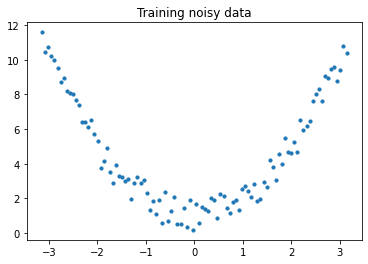

In [22]:
# Create some synthetic data
x = torch.linspace(-np.pi,np.pi,100)
m = 2
y = x**2 + torch.rand(x.shape)*2  # Quadratic
# y = x**2 + np.sin(x) - 2*np.cos(3*x) + torch.rand(x.shape)*1  # Sine

plt.scatter(x,y, s=10)
plt.title("Training noisy data")

We are now testing three models

1. Single neuron model
2. Mulitple neurons in a single hidden layer with ReLu for the non-linearity

Relu: 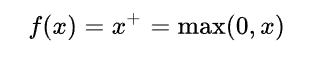
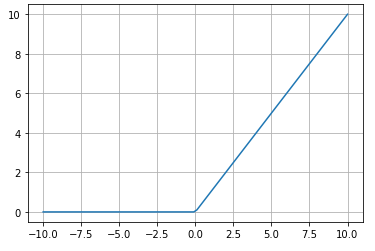

3. Multiple Hidden layers with ReLu and Batch Normalization


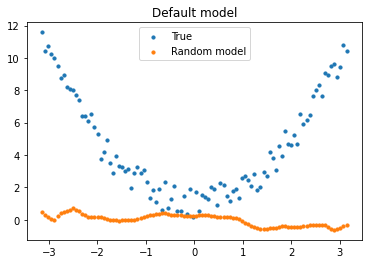

In [30]:
# Models are created by classes that inherit from Module
class SingleNeuronModel(nn.Module):
    # On the init function we define our model
    def __init__(self):
        super(SingleNeuronModel, self).__init__() # Constructor of parent class
        self.ex_model= nn.Sequential(
            nn.Linear(1, 1)
        )
    
    # On the forward function we indicate how to make one 'pass' of the model
    def forward(self, x):
        return self.ex_model(x)

class MultipleNeuronModelSingleHiddenLayer(nn.Module):
    # On the init function we define our model
    def __init__(self):
        super(MultipleNeuronModelSingleHiddenLayer, self).__init__() # Constructor of parent class
        self.hidden_neurons = 200
        self.input_layer =  nn.Linear(1, self.hidden_neurons)
        self.relu = nn.ReLU()
        self.bn = nn.BatchNorm1d(self.hidden_neurons)
        self.output_layer =   nn.Linear(self.hidden_neurons, 1)
    
    # On the forward function we indicate how to make one 'pass' of the model
    def forward(self, x):
        # l1 = self.input_layer(x)  # Without no-linearity
        l1 = self.relu(self.input_layer(x))  # With simple non-linear function
        # l1 = self.bn(self.relu(self.input_layer(x)))  # With batch normalization
        l2 = self.output_layer(l1)
        return l2
    
class MultipleNeuronModelMultipleHiddenLayer(nn.Module):
    # On the init function we define our model
    def __init__(self):
        super(MultipleNeuronModelMultipleHiddenLayer, self).__init__() # Constructor of parent class
        self.hidden_neurons = 200
        self.input_layer =  nn.Linear(1, self.hidden_neurons)
        self.bn = nn.BatchNorm1d(self.hidden_neurons)
        self.hidden_layer =  nn.Linear(self.hidden_neurons, self.hidden_neurons)
        self.relu = nn.ReLU()
        self.output_layer =   nn.Linear(self.hidden_neurons, 1)
    
    # On the forward function we indicate how to make one 'pass' of the model
    def forward(self, x):
        l1 = self.bn(self.relu(self.input_layer(x)))  # With simple non-linear function
        for i in range(2):
            l1 = self.bn(self.relu(self.hidden_layer(l1)))  # With batch normalization
        l2 = self.output_layer(l1)
        return l2
    
# ex_model = SingleNeuronModel().to(device)
# ex_model = MultipleNeuronModelSingleHiddenLayer().to(device)
ex_model = MultipleNeuronModelMultipleHiddenLayer().to(device)

# print(list(ex_model.named_parameters()))
# Reshape to the proper input of the network
X = torch.reshape(x, (x.shape[0],1)).to(device)
Y = torch.reshape(y, (y.shape[0],1)).to(device)

#-------------- Just for plotting --------------
fig, ax = plt.subplots(1,1)
def plotCurrentModel(x, y, model, ax):
    # Torch receives inputs with shape [Examples, input_size]
    model_y = model(X).cpu().detach().numpy()

    ax.scatter(x, y, s=10, label='True')
    ax.scatter(x, model_y, s=10, label='Random model')
    ax.set_title('Default model')
    ax.legend()
    
plotCurrentModel(x, y, ex_model, ax)

3.Optimize the parameters of the model using backpropagation 

In [31]:
loss_mse = nn.MSELoss() # Define loss function
optimizer = torch.optim.SGD(ex_model.parameters(), lr=1e-3) # Define optimization algorithm

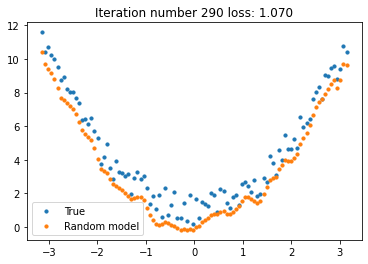

Done!


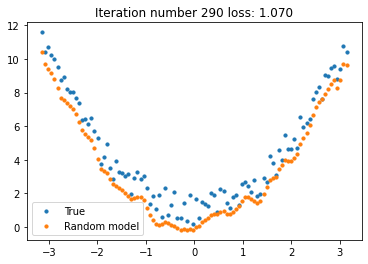

In [32]:
# Optimize the parameters several times

fig, ax = plt.subplots(1,1)
ex_model.train()
for i in range(300):
    pred = ex_model(X)
    loss = loss_mse(pred, Y)
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # ---------- Just for plotting ---------
    if i % 10 == 0: 
        title = f"Iteration number {i} loss: {loss:0.3f}"
        print(title)
        ax.cla()
        display.clear_output(wait =True)
        plotCurrentModel(x, y, ex_model, ax)
        ax.set_title(title)
        plt.draw()
        t.sleep(0.1)
        display.display(plt.gcf())
    
print("Done!")
    